<a href="https://colab.research.google.com/github/pedro07br/HealthyPredict/blob/main/HealthyPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
df = pd.read_excel("database_alimentos.xlsx")
df.head()

Saving database_alimentos.xlsx to database_alimentos.xlsx


Nome do Alimento  Calorias (kcal)  Carboidratos (g)  Proteínas (g)  \
0         Brócolis               34               7.0            3.0   
1        Espinafre               23               3.6            2.9   
2           Salmão              208               0.0           20.0   
3           Quinoa              120              21.0            4.1   
4         Amêndoas              579              22.0           21.0   

   Gorduras Totais (g)   Classificação  
0                  0.4  Muito saudável  
1                  0.4  Muito saudável  
2                 13.0  Muito saudável  
3                  1.9  Muito saudável  
4                 50.0  Muito saudável

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=["Classificação", "Nome do Alimento"])
X = X.select_dtypes(include=[np.number])
y = df["Classificação"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.8

Relatório de classificação:
                 precision    recall  f1-score   support

Muito saudável       0.00      0.00      0.00         0
  Não saudável       1.00      1.00      1.00         3
Pouco saudável       1.00      1.00      1.00         4
      Saudável       1.00      0.33      0.50         3

      accuracy                           0.80        10
     macro avg       0.75      0.58      0.62        10
  weighted avg       1.00      0.80      0.85        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


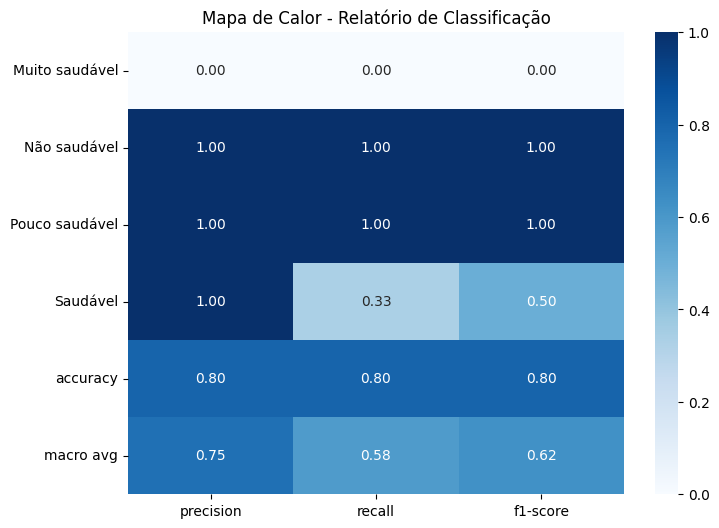

In [47]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Mapa de Calor - Relatório de Classificação")
plt.show()

In [43]:
novo_alimento = pd.DataFrame([[50, 5, 5, 3]], columns=X.columns)

classe_prevista = modelo.predict(novo_alimento)
print("Classificação prevista:", classe_prevista[0])

novo_alimento = pd.DataFrame([[111, 23, 2.6, 0.9]], columns=X.columns)

classe_prevista = modelo.predict(novo_alimento)
print("Classificação prevista:", classe_prevista[0])

novo_alimento = pd.DataFrame([[50, 50, 50, 3]], columns=X.columns)

classe_prevista = modelo.predict(novo_alimento)
print("Classificação prevista:", classe_prevista[0])

novo_alimento = pd.DataFrame([[500, 50, 5, 30]], columns=X.columns)

classe_prevista = modelo.predict(novo_alimento)
print("Classificação prevista:", classe_prevista[0])

Classificação prevista: Muito saudável
Classificação prevista: Saudável
Classificação prevista: Pouco saudável
Classificação prevista: Não saudável


In [44]:
y_pred_all = modelo.predict(X)

df["Classificacao_Prevista"] = y_pred_all

print(df[["Nome do Alimento", "Classificacao_Prevista"]].head(50))


                   Nome do Alimento Classificacao_Prevista
0                          Brócolis         Muito saudável
1                         Espinafre         Muito saudável
2                            Salmão         Muito saudável
3                            Quinoa         Muito saudável
4                          Amêndoas         Muito saudável
5                             Aveia         Muito saudável
6                          Lentilha         Muito saudável
7                      Grão-de-bico         Muito saudável
8                           Abacate         Muito saudável
9                       Batata-doce         Muito saudável
10                          Mirtilo         Muito saudável
11                             Chia         Muito saudável
12                         Sardinha         Muito saudável
13                   Arroz integral               Saudável
14                           Banana               Saudável
15                             Maçã               Saudáv